In [7]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

import math
from scipy.stats import norm
import matplotlib.mlab as mlab
%config InlineBackend.figure_format='retina'

## Exercise 06: Ising Model

In the following exercise the simulation of an Ising 1D system is performed. The goal of the exercise is to evaluate the evolution with respect to temperature of thermodynamic quantities of interest. The thermodynamic quantities are:
- Energy (for null external magnetic field $h = 0$) 
- Heat capacity ($h = 0$)
- Magnetic susceptivity ($h = 0$)
- Magnetization ($h = 0.02$)

The simulation is performed starting from a trial $T = \infty$ equilibrium state both via the Gibbs and Metropolis sampling.

### Ising model

Given the Hamiltonian of a statistical sistem $\mathcal{H}$ the PDF of the whole system is given by:
$$
\rho(x) = \frac{e^{-\beta\mathcal{H(x)}}}{Z}
$$
where $Z$ is the normalization known as *partition function* and $x$ is an element of the set of microstates that describe the system (e.g. $(p,q)$) . Knowing the explicit form of the partition function, the thermodynamic quantities listed above are directly relatable to the parameters entering the system Hamiltonian. This is usually not the case as the calculation of the partition funciton involves a multidimensional integral.

The Ising model is a famous statistical mechanics model that essentially describes a chain (for the 1D case) of spins that interact with each other through the model Hamiltonian (given below). This model finds application in describing the nature of magnets.
$$
\mathcal{H} = -J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$ (periodic boundary conditions).

In order to numerically compute the value of thermodynamic quantities of interest $\langle \mathcal{O} \rangle$ arises the problem of sampling the Boltzmann distribution. This problem is solved using sampling technique such as Metropolis or Gibbs, which do not require the knowledge of the calculation of the partition function.  

Being the 1D Ising module exactly solvable the plots are shown superimposed on the analytical solutions

### Metropolis

Metropolis applied to the case of the Ising model works in this way:
- an initial spin configuration is chosen (in this case the equilibrium state for $T = \infty$ is chosen which means all the spins are randomly oriented)
- a random spin site is chosen (this is the transition $T(\text{new state}|\text{old state}$))
- the "proposed move" is the spin flip and the energy in the two configurations in computed ($E_{old}$ and $E_{new}$)
- the move is accepted with acceptance rate given by: $\min(1;\exp(\beta \,(E_{old}-E_{new})) = A(\text{new state}|\text{old state})$
- which means that the move is surely accepted if the new energy is better (lower) than the old one

### Gibbs

In the Gibbs sampling the proposed move is always accepted. It works in this way:
- an initial spin configuration is chosen (in this case the equilibrium state for $T = \infty$ is chosen which means all the spins are randomly oriented)
- the proposed move is then: each spin is defined as up ($+$) or down ($-$) with probability given by the conditional probability where all other spins are kept fixed. This turns out to be a Markov chain with transition given by:
$$
T(\sigma_i = \pm|\{\sigma_k\}_{k \neq i}) = \frac{1}{1+\exp(\mp2\beta J\sum_{j \neq i}\sigma_j)}
$$

### Equilibration and mean calculation

Starting from a randomly oriented spins the system must be equilibrated. This is done by calculating a thermodynamic quantity and studying its plot. When it starts showing a "scale invariant" trend the equilibration can be considered to be fulfilled. 
The mean value of the quantities is then expected to be the ensemble average as the ergodic assumption is considered to hold (the performed average is a "time" average with respect to Metropolis/Gibbs steps).
The errors are calculated with data blocking, performed with 20 blocks of 10000 steps each

In [8]:
t1, e1 = np.loadtxt("ISING_1D/Equilibration/Low_temp_h=0.txt", usecols = (0,1), unpack = "true")
t2, e2 = np.loadtxt("ISING_1D/Equilibration/Middle_temp_h=0.txt", usecols = (0,1), unpack = "true")
t3, e3 = np.loadtxt("ISING_1D/Equilibration/High_temp_h=0.txt", usecols = (0,1), unpack = "true")

t4, e4 = np.loadtxt("ISING_1D/Equilibration/Low_temp_h=0.02.txt", usecols = (0,1), unpack = "true")
t5, e5 = np.loadtxt("ISING_1D/Equilibration/Middle_temp_h=0.02.txt", usecols = (0,1), unpack = "true")
t6, e6 = np.loadtxt("ISING_1D/Equilibration/High_temp_h=0.02.txt", usecols = (0,1), unpack = "true")

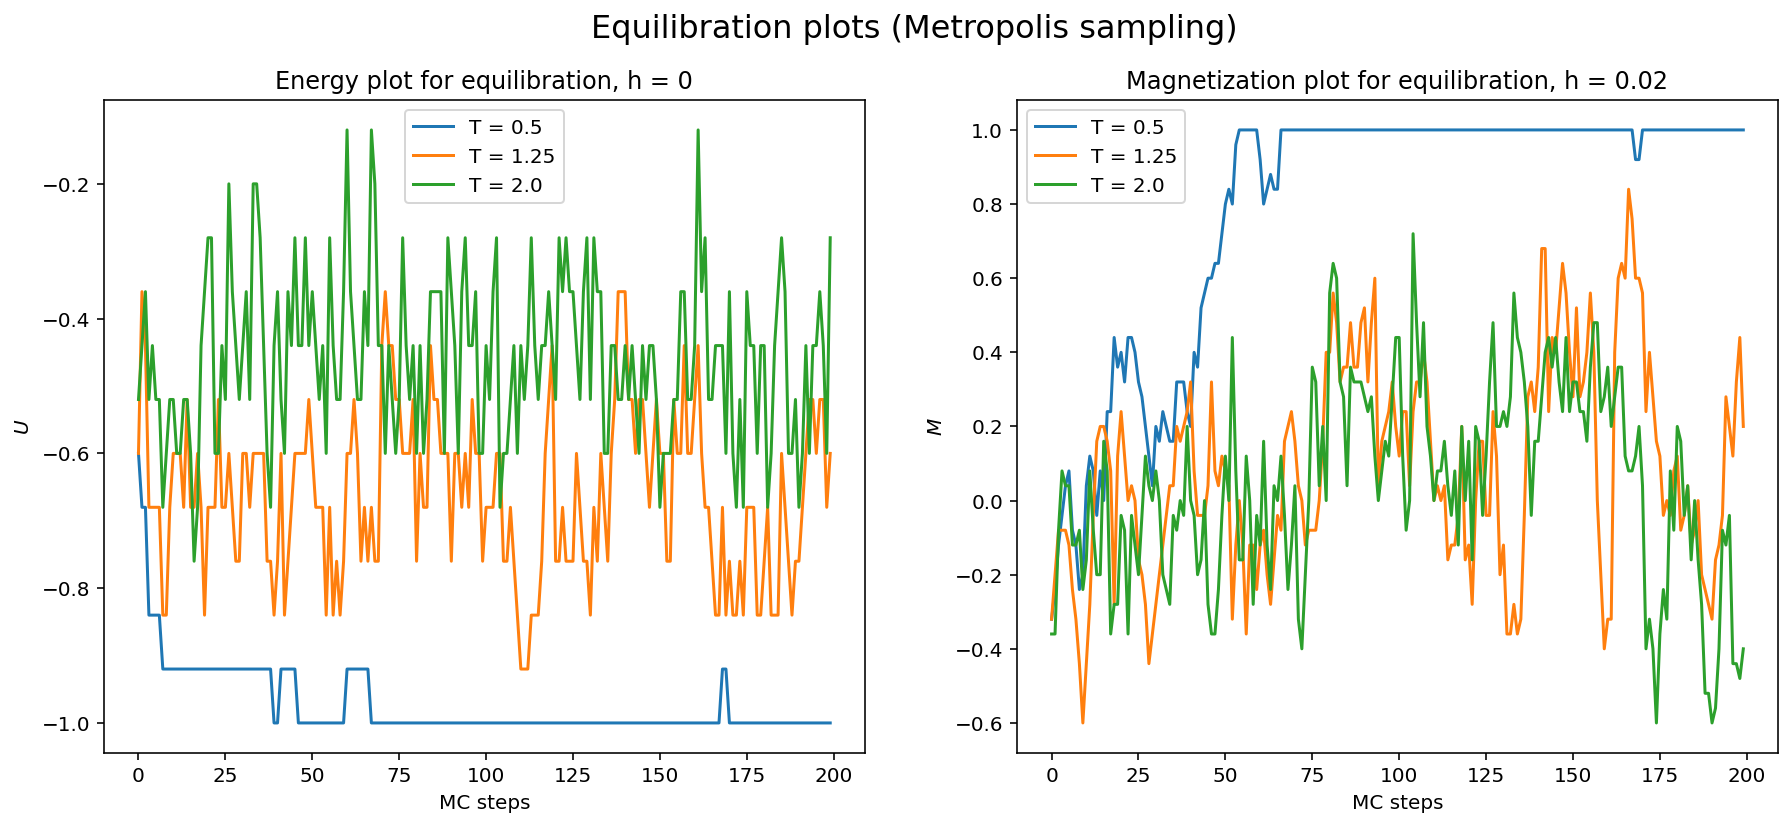

In [9]:
fig, axs = plt.subplots(1,2, figsize=(15,6), squeeze = False)
fig.suptitle("Equilibration plots (Metropolis sampling)", fontsize=16)

axs[0][0].plot(t1,e1, label = "T = 0.5")
axs[0][0].plot(t2,e2, label = "T = 1.25")
axs[0][0].plot(t3,e3, label = "T = 2.0")
axs[0][0].set_title("Energy plot for equilibration, h = 0")
axs[0][0].set_ylabel("$U$")
axs[0][0].set_xlabel("MC steps")

axs[0][1].plot(t4,e4, label = "T = 0.5")
axs[0][1].plot(t5,e5, label = "T = 1.25")
axs[0][1].plot(t6,e6, label = "T = 2.0")
axs[0][1].set_title("Magnetization plot for equilibration, h = 0.02")
axs[0][1].set_ylabel("$M$")
axs[0][1].set_xlabel("MC steps")



axs[0][0].legend()
axs[0][1].legend()
plt.show()

In [10]:
x1, f1, err1 = np.loadtxt("ISING_1D/Obs_T/Energy_v_T_Gibbs.txt", usecols = (0,1,2), unpack = "true")
x2, f2, err2 = np.loadtxt("ISING_1D/Obs_T/Heat_capacity_v_T_Gibbs.txt", usecols = (0,1,2), unpack = "true")
x3, f3, err3 = np.loadtxt("ISING_1D/Obs_T/Suscepticity_v_T_Gibbs.txt", usecols = (0,1,2), unpack = "true")
x4, f4, err4 = np.loadtxt("ISING_1D/Obs_T/Magnetization_v_T_Gibbs.txt", usecols = (0,1,2), unpack = "true")

a1, b1, err_1 = np.loadtxt("ISING_1D/Obs_T/Energy_v_T_Metro.txt", usecols = (0,1,2), unpack = "true")
a2, b2, err_2 = np.loadtxt("ISING_1D/Obs_T/Heat_capacity_v_T_Metro.txt", usecols = (0,1,2), unpack = "true")
a3, b3, err_3 = np.loadtxt("ISING_1D/Obs_T/Suscepticity_v_T_Metro.txt", usecols = (0,1,2), unpack = "true")
a4, b4, err_4 = np.loadtxt("ISING_1D/Obs_T/Magnetization_v_T_Metro.txt", usecols = (0,1,2), unpack = "true")



In [11]:
points=100
T = np.linspace(0.5,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

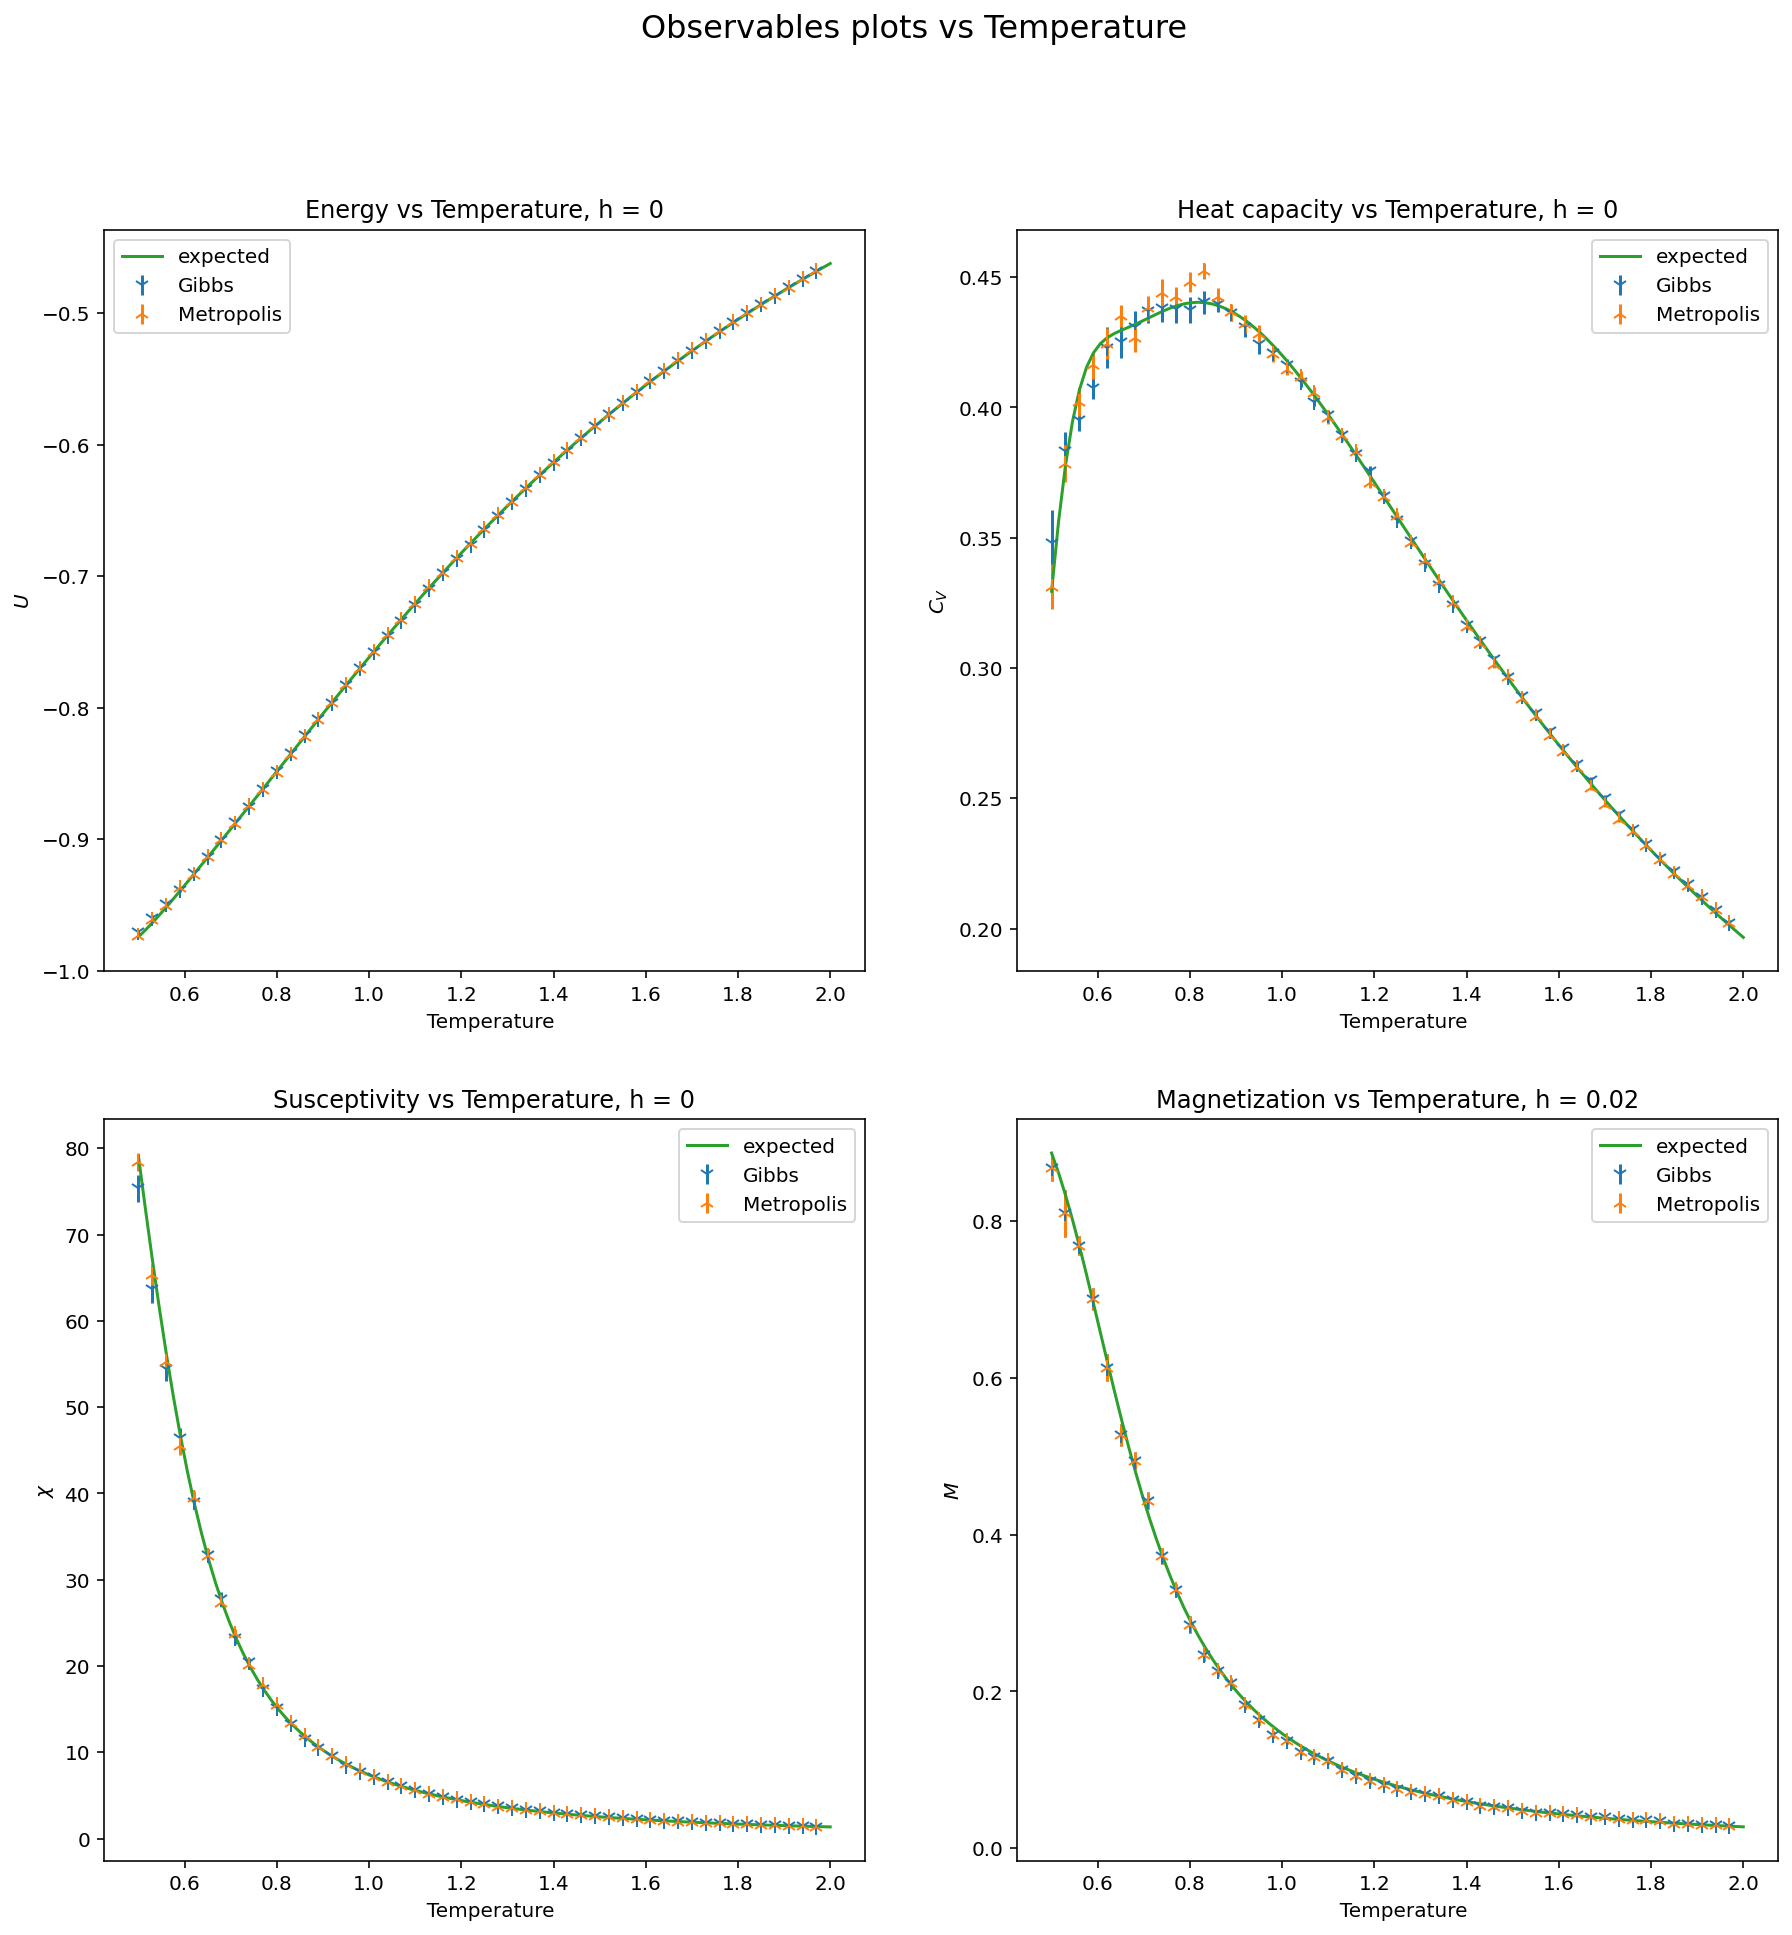

In [12]:
fig, axs = plt.subplots(2,2, figsize=(15,15))

fig.suptitle("Observables plots vs Temperature", fontsize=16)

axs[0][0].errorbar(x1,f1, yerr = err1, ls='none', label = "Gibbs", marker = "1", markersize=8)
axs[0][0].set_title("Energy vs Temperature, h = 0")
axs[0][1].errorbar(x2,f2, yerr = err2, ls='none', label = "Gibbs", marker = "1", markersize=8)
axs[0][1].set_title("Heat capacity vs Temperature, h = 0")
axs[1][0].errorbar(x3,f3, yerr = err3, ls='none', label = "Gibbs", marker = "1", markersize=8)
axs[1][0].set_title("Susceptivity vs Temperature, h = 0")
axs[1][1].errorbar(x4,f4, yerr = err4, ls='none', label = "Gibbs", marker = "1", markersize=8)
axs[1][1].set_title("Magnetization vs Temperature, h = 0.02")

axs[0][0].errorbar(a1,b1, yerr = err_1, ls='none', label = "Metropolis", marker = "2", markersize=8)
axs[0][1].errorbar(a2,b2, yerr = err_2, ls='none', label = "Metropolis", marker = "2", markersize=8)
axs[1][0].errorbar(a3,b3, yerr = err_3, ls='none', label = "Metropolis", marker = "2", markersize=8)
axs[1][1].errorbar(a4,b4, yerr = err_4, ls='none', label = "Metropolis", marker = "2", markersize=8)

axs[0][0].plot(T, e, label = "expected")
axs[0][1].plot(T, heat, label = "expected")
axs[1][0].plot(T, X, label = "expected")
axs[1][1].plot(T, M, label = "expected")

axs[0][0].set_ylabel("$U$")
axs[0][1].set_ylabel("$C_V$")
axs[1][0].set_ylabel("$\chi$")
axs[1][1].set_ylabel("$M$")

for i in range(2):
    for j in range(2):
        axs[i][j].set_xlabel("  Temperature")

for i in range(2):
    for j in range(2):
        axs[i][j].legend()